In [14]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import pearsonr

### Check old / new mono descriptors

In [16]:
old = pd.read_csv('../results/features/mono-descriptors-v1.csv', index_col=0)
new = pd.read_csv('../results/rekas/mono-descriptors-more_MorganFingerprints_MACCS_and_otherchemfeatures.csv', index_col=0)

In [17]:
shared = list(set(old.index) & set(new.index))

In [18]:
for d in old.columns:
    print(d, pearsonr(old.loc[shared, d], new.loc[shared, d]))

INTENSITY/STRENGTH PearsonRResult(statistic=0.9282813638630385, pvalue=9.38891256329454e-45)
VALENCE/PLEASANTNESS PearsonRResult(statistic=0.9528768504160569, pvalue=1.3087160417826347e-53)
BAKERY PearsonRResult(statistic=0.9704514395618027, pvalue=1.474758442650328e-63)
SWEET PearsonRResult(statistic=0.9464949615606569, pvalue=6.406792131317273e-51)
FRUIT PearsonRResult(statistic=0.9460829428808062, pvalue=9.30687081210051e-51)
FISH PearsonRResult(statistic=0.9494406831514233, pvalue=4.059600466900473e-52)
GARLIC PearsonRResult(statistic=0.9780844985467674, pvalue=5.7556957254332e-70)
SPICES PearsonRResult(statistic=0.910699879852665, pvalue=3.4900637975596826e-40)
COLD PearsonRResult(statistic=0.946087397720998, pvalue=9.269518222683988e-51)
SOUR PearsonRResult(statistic=0.9698553617471615, pvalue=3.9454792003747176e-63)
BURNT PearsonRResult(statistic=0.8837657609441578, pvalue=9.362250041785109e-35)
ACID PearsonRResult(statistic=0.9433517027397216, pvalue=1.029363629394718e-49)
WARM

### Check correlation features

In [63]:
train = pd.read_csv('../data/olfaction_mixture/Mixure_Definitions_Training_set.csv')
train.index = train['Dataset'] + "_" + train['Mixture Label'].astype(str)
del train['Dataset']
del train['Mixture Label']

In [64]:
mono = pd.read_csv('../results/features/mono-descriptors-v1.csv', index_col=0)
mono = (mono - mono.mean()) / mono.std()

In [91]:
min_max = pd.read_csv('../results/rekas/Corr_MinMAx_Test_set.csv', index_col=0)

In [45]:
a = train.loc['Snitz 1_1']
a = a.values[a.values!=0]
b = train.loc['Snitz 1_2']
b = b.values[b.values!=0]

In [70]:
c = mono.loc[list(a)+list(b)].T.corr().loc[list(a), list(b)]

In [85]:
c.min(1).max()

-0.38544058066208675

<Axes: >

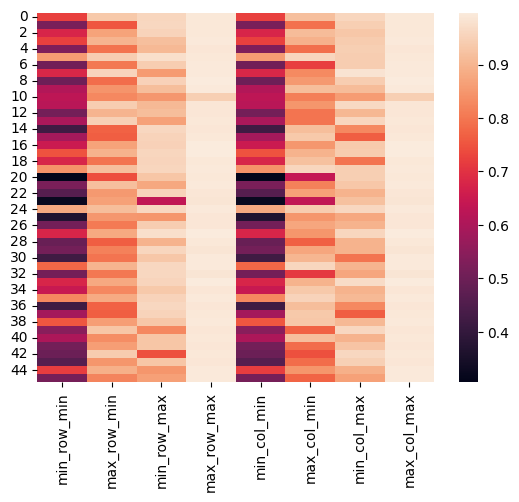

In [92]:
sns.heatmap(min_max.iloc[:, 2:])

In [89]:
min_max

,Mixture 1,Mixture 2,min_row_min,max_row_min,min_row_max,max_row_max,min_col_min,max_col_min,min_col_max,max_col_max
0,Snitz 1_1,Snitz 1_2,0.565502,0.777072,0.919761,0.988552,0.565502,0.903965,0.876950,0.988552
1,Snitz 1_1,Snitz 1_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Snitz 1_1,Snitz 1_5,0.468925,0.785581,0.894909,0.996357,0.468925,0.775674,0.916670,0.996357
3,Snitz 1_1,Snitz 1_6,0.343953,0.807378,0.894909,0.996357,0.343953,0.774973,0.916670,0.996357
4,Snitz 1_1,Snitz 1_7,0.675566,0.777072,0.977578,0.978078,0.675566,0.977578,0.779967,0.978078
...,...,...,...,...,...,...,...,...,...,...
495,Bushdid_509,Bushdid_510,0.477897,0.802164,0.969552,1.000000,0.477897,0.772270,0.967959,1.000000
496,Bushdid_513,Bushdid_514,0.403918,0.832036,0.844231,0.993162,0.403918,0.769423,0.910009,0.993162
497,Bushdid_515,Bushdid_516,0.666342,0.870023,0.923862,1.000000,0.666342,0.789722,0.931852,1.000000
498,Bushdid_517,Bushdid_518,0.525877,0.812690,0.916281,0.992734,0.525877,0.836338,0.957810,0.992734
